# Bloque 1

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Zoop Pay

Has recibido una nueva solicitud de las partes interesadas de Zoop, en la que será necesario agregar más columnas de otra base de datos a la tabla consolidada en el video anterior.

A diferencia de las actividades que estamos realizando en los videos de este curso, aquí también utilizaremos esta nueva base para la construcción de los visuales dentro de los ejercicios de "Manos a la obra", enfocándonos en las demandas presentadas en las instrucciones de los ejercicios.

Los archivos que vamos a utilizar en esta parte del proyecto son:

* Datos de clientes del e-commerce de Zoop, separados por el código identificador de la compra.
* Datos de ventas del e-commerce de Zoop en 2023, separados por el código identificador de la compra.
* Datos de clientes pre-registrados en Zoop Pay, la billetera digital de Zoop que está en proceso de implementación.

Estos datos se leerán a través de enlaces (URL) que compartimos a continuación:

In [4]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

Ahora que ya sabemos cuáles son los datos necesarios para la realización del proyecto, vamos a abrir el notebook mencionado anteriormente y realizar la siguiente actividad:

Construye y ejecuta un prompt en ChatGPT solicitando que lea las tres bases de datos y cree una única tabla concatenándolas. Recuerda ser bastante específico en cuanto al orden de las columnas y cuáles serán necesarias para realizar la concatenación de los datos, además de tratar la columna de fecha para el formato adecuado.

**Consejo 1**: Para facilitar el proceso, pide a ChatGPT que primero concatene los datos de clientes y ventas en una tabla llamada df y, finalmente, que concatene esta nueva tabla con la base de clientes pre-registrados en Zoop Pay, generando así la tabla consolidada con todos los datos. Este proceso puede realizarse paso a paso en dos prompts, por ejemplo.

Si necesitas ayuda, una opción de solución de la actividad estará disponible en la sección "Opinión del instructor".

In [5]:
clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

In [6]:
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [7]:
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [8]:
zoop_pay.head()

,ID_cliente,zoop_pay
0,6149,No
1,9491,Sí
2,5288,No
3,9679,Sí
4,1380,No


In [9]:
zoop_pay.head()

,ID_cliente,zoop_pay
0,6149,No
1,9491,Sí
2,5288,No
3,9679,Sí
4,1380,No


In [10]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [11]:
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format = '%Y-%m-%d')

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Tengo otra tarea, me ayudas?
Tengo que concatenar dos bases de datos "ventas" y "compras" ambos son dataframes, concatenalas y quiero que el orden de las columnas quede de la siguiente manera ID_compra, fecha, horario, cantidad, categoria, precio_unitario, envio, metodo_pago, ID_cliente, ciudad, estado, region, edad, sexo_biologico, cashback, nota

¡Claro que sí, Luis! Aquí tienes el código para **concatenar los DataFrames `ventas` y `compras`** y reorganizar las columnas en el orden que indicaste:

In [12]:
# Concatenación vertical de las bases de datos
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

In [13]:
# Reordenamiento de columnas según lo solicitado
orden_columnas = [
    'ID_compra',
    'fecha',
    'horario',
    'cantidad',
    'categoria',
    'precio_unitario',
    'envio',
    'metodo_pago',
    'ID_cliente',
    'ciudad',
    'estado',
    'region',
    'edad',
    'sexo_biologico',
    'cashback',
    'nota'
]

In [14]:
# Aplicar el orden al DataFrame final
df = df[orden_columnas]

🔹 Este código asume que las columnas en ambos DataFrames (`ventas` y `compras`) ya están normalizadas y tienen nombres consistentes.

🔹 Si algunas columnas no están en ambos DataFrames, Pandas rellenará con `NaN` donde falten valores.

¿Quieres que verifiquemos primero si tienen exactamente las mismas columnas antes de concatenar? También puedo ayudarte con eso si lo necesitas.


In [15]:
df.head()

,ID_compra,fecha,horario,cantidad,categoria,precio_unitario,envio,metodo_pago,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,6,2023-01-03,20:40,4,Electrónicos,4457.9,713.26,Paypal,6149,Hermosillo,Sonora,Noroeste,30,Masculino,Sí,10
1,5,2023-01-03,21:48,1,Herramientas y construcción,115.9,0.00,Transferencia,9491,Ciudad de México,Ciudad de México,Centro,36,Masculino,Sí,8
2,9,2023-01-03,17:08,2,Belleza e higiene,68.9,13.78,Tarjeta de Crédito,5288,Aguascalientes,Aguascalientes,Centro-Norte,39,Femenino,No,7
3,4,2023-01-03,14:29,5,Herramientas y construcción,80.9,40.45,Transferencia,9679,Veracruz,Veracruz,Golfo,35,Masculino,Sí,9
4,8,2023-01-03,18:02,4,Belleza e higiene,165.0,0.00,Transferencia,1380,Ciudad de México,Ciudad de México,Centro,50,Masculino,No,9


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Me gusto mucho, ya quedo, ahora quiero que unas el nuevo "df" con otro dataframe "zoop_pay".

¡Perfecto, Luis! Me alegra saber que ya te quedó bien la unión anterior. Ahora para **unir el nuevo `df` con el DataFrame `zoop_pay`**, primero necesitamos tener claro **cuál es la columna común** entre ellos.

---

### ✅ Asumamos que la columna común es `ID_compra` (como en los anteriores)

Entonces puedes usar este código:

```python
# Unión de df con zoop_pay usando ID_compra como clave
df = pd.merge(df, zoop_pay, on='ID_compra', how='inner')
```

---

### 🔄 Si la columna común es otra, como `ID_cliente` o `metodo_pago`

Solo cambia el parámetro `on='otra_columna'`. Por ejemplo:

```python
# Si la clave es ID_cliente
df = pd.merge(df, zoop_pay, on='ID_cliente', how='inner')
```

---

### 🧠 Tip adicional: si quieres conservar toda la información del `df` original aunque no haya coincidencias en `zoop_pay`, usa `how='left'`:

```python
df = pd.merge(df, zoop_pay, on='ID_compra', how='left')
```

---

¿Quieres que valide si las columnas clave existen en ambos DataFrames antes de hacer la unión? También te puedo ayudar a ver cuántas filas se pierden o ganan después del merge.


In [16]:
df = pd.merge(df, zoop_pay, on='ID_cliente', how='inner')

In [17]:
df

,ID_compra,fecha,horario,cantidad,categoria,precio_unitario,envio,metodo_pago,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota,zoop_pay
0,6,2023-01-03,20:40,4,Electrónicos,4457.9,713.26,Paypal,6149,Hermosillo,Sonora,Noroeste,30,Masculino,Sí,10,No
1,5,2023-01-03,21:48,1,Herramientas y construcción,115.9,0.00,Transferencia,9491,Ciudad de México,Ciudad de México,Centro,36,Masculino,Sí,8,Sí
2,9,2023-01-03,17:08,2,Belleza e higiene,68.9,13.78,Tarjeta de Crédito,5288,Aguascalientes,Aguascalientes,Centro-Norte,39,Femenino,No,7,No
3,4,2023-01-03,14:29,5,Herramientas y construcción,80.9,40.45,Transferencia,9679,Veracruz,Veracruz,Golfo,35,Masculino,Sí,9,Sí
4,8,2023-01-03,18:02,4,Belleza e higiene,165.0,0.00,Transferencia,1380,Ciudad de México,Ciudad de México,Centro,50,Masculino,No,9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,6141,2023-12-31,17:49,5,Electrodomésticos,1509.9,377.48,Tarjeta de Crédito,6035,Cholula,Puebla,Centro-Sur,49,Masculino,No,10,No
6165,6148,2023-12-31,23:02,2,Papelería y oficina,14.0,3.36,Transferencia,7361,Mazatlán,Sinaloa,Noroeste,40,Masculino,Sí,7,No
6166,6123,2023-12-31,21:25,1,Alimentos y bebidas,77.9,7.79,Tarjeta de Crédito,4516,Aguascalientes,Aguascalientes,Centro-Norte,32,Masculino,No,8,No
6167,6147,2023-12-31,21:38,4,Libros,142.9,17.15,Tarjeta de Crédito,3786,Guadalajara,Jalisco,Occidente,34,Masculino,No,9,No


# Bloque 2 - generando visualizaciones con respecto a la localización

¿Vamos a practicar lo que aprendimos a partir del DataFrame `df` que generamos en el ejercicio de Manos a la Obra anterior?

Has recibido una nueva demanda de Zoop para generar 2 nuevos visuales, uno relacionado con el perfil de las ventas y el otro con el perfil de los clientes de una región específica. Vamos a observar las dos situaciones y construir, con la ayuda de ChatGPT, los dos gráficos solicitados:

## Desafío 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Hola, me puedes ayudar a generar una grafica utilizando seaborn? desde un data frame que se llama df vas a crear la facturacion de ventas por region, para esto tienes que extraer las columnas "precio_unitario","cantidad","envio". con estas tres columnas obtendras la facturacion, la cual se hace de la siguiente manera: multiplica el "precio_unitario" por la "cantidad" y al final le sumas el "costo", si estoy equivocado lo corriges.

Ya que tengas la facturacion, agregas una nueva columna a df con el nombre "facturacion" e ingresas los respectivos datos de facturacion.

Despues filtra la facturacion por region ("region" la obtienes de df["region"]) y creas una grafica con ese filtro.

---

Claro, Luis, vamos paso por paso. Primero vamos a verificar el cálculo de la facturación y después generamos la gráfica con **Seaborn** para visualizarla **por región**.

### ✅ Paso 1: Calcular la facturación

El cálculo que propones es:
```Python
facturacion = (precio_unitario * cantidad) + envio
```

Este cálculo **es correcto** si el campo `"envio"` representa un **costo adicional fijo por compra**, y no un costo por unidad. Si fuera un costo por unidad, tendríamos que multiplicarlo también por `"cantidad"`. Pero si no se indica lo contrario, asumiremos que está bien como lo mencionas.

### ✅ Paso 2: Crear la columna `facturacion` en el DataFrame

In [18]:
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

### ✅ Paso 3: Agrupar facturación por región

In [24]:
facturacion_region = df.groupby('region')['facturacion'].sum().sort_values(ascending=False).reset_index()

In [25]:
facturacion_region

,region,facturacion
0,Centro,3892973.39
1,Noroeste,3675610.54
2,Noreste,2714735.12
3,Centro-Norte,1402610.45
4,Occidente,1362102.38
5,Centro-Sur,1317884.94
6,Golfo,1112592.94
7,Sur,819569.61
8,Sureste,680928.14


Esto te dará un DataFrame como este:

| region | facturacion |
| ------ | ----------- |
| Norte  | 102300      |
| Centro | 87500       |
| Sur    | 90320       |

### ✅ Paso 4: Graficar con Seaborn

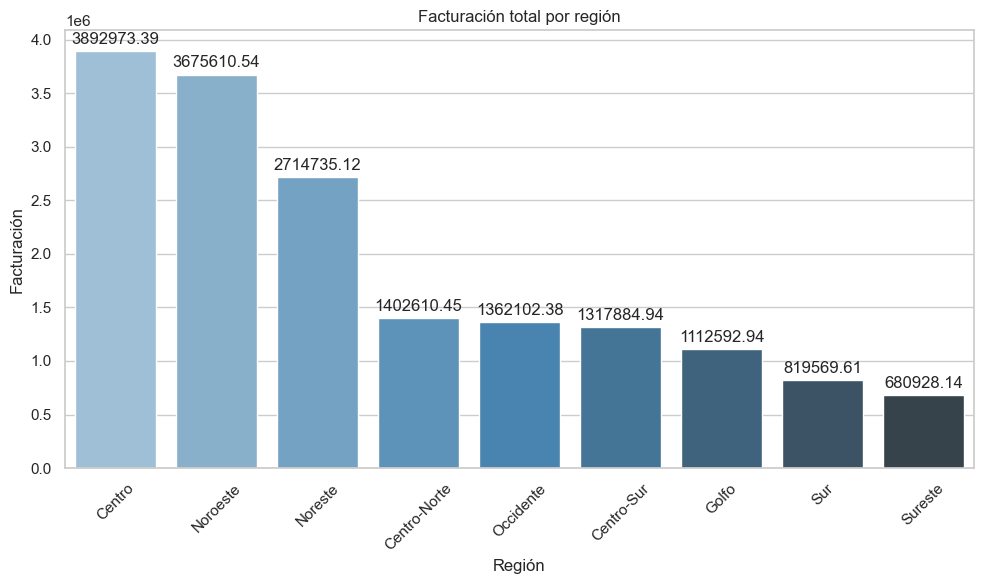

In [38]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=facturacion_region, x='region', y='facturacion', hue='region', palette='Blues_d', legend=False)

# Agregar etiquetas con valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.title('Facturación total por región')
plt.xlabel('Región')
plt.ylabel('Facturación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<!-- ### ✅ Resultado

Tendrás un gráfico de barras con una barra por cada región, mostrando la **facturación total**.

¿Quieres que ordene las regiones de mayor a menor facturación o lo dejamos en orden alfabético? También podríamos añadir etiquetas de valores encima de cada barra si deseas. -->


### 🏷️ Paso para agregar etiquetas encima de las barras:

- ``fmt='%.2f'``: muestra los valores con 2 decimales.

- ``label_type='edge'``: coloca las etiquetas encima de las barras.

- ``padding=3``: separa un poco el texto de la barra para que se vea mejor.

## Desafío 2:

Zoop quiere realizar una campaña en los estados de México y Puebla, por lo que necesita conocer el perfil de su público según el sexo biológico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composición del público por sexo biológico en los estados de México y Puebla. Recuerda pedir que agrupe o apile los datos para la presentación.

Si necesitas ayuda, una opción de solución de la actividad estará disponible en la sección “Opinión del instructor”.

### Obten un dato especifico de una columna

Si queremos obtener los datos de puebla de la columna estado utilizamos la siguiente linea de código

In [44]:
df[df['estado'] == 'Puebla'].sample()

,ID_compra,fecha,horario,cantidad,categoria,precio_unitario,envio,metodo_pago,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota,zoop_pay,facturacion
4355,4344,2023-11-14,17:40,1,Alimentos y bebidas,6.9,0.41,Paypal,8820,Cholula,Puebla,Centro-Sur,41,Masculino,No,10,No,7.31


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Por favor, puedes ayudarme a generar una grafica con seaborn en el que muestre la composicion del público por sexo biológico en los estados de México y Puebla, puedes agruparlos y apilar los datos para la grafica?

las columnas a utilizar son:
df["sexo_biologico"]
df["estado"]
y si es necesario especificar utiliza df[df['estado'] == 'Puebla']


---

¡Con gusto! Te muestro cómo crear una **gráfica de barras apiladas con Seaborn** (o más bien, con ayuda de **matplotlib**, porque Seaborn no admite barras apiladas directamente) para mostrar la **composición del público por sexo biológico** en los estados **México** y **Puebla**.

### ✅ Paso 1: Filtrar y agrupar los datos

Primero, filtramos los estados de interés y contamos cuántas personas hay por sexo biológico en cada uno:

In [53]:
# Filtrar solo los estados México y Puebla
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

In [52]:
df['estado'].unique()

array(['Sonora', 'Ciudad de México', 'Aguascalientes', 'Veracruz',
       'Chihuahua', 'Nuevo León', 'Puebla', 'Oaxaca', 'Sinaloa',
       'Coahuila', 'Baja California', 'Estado de México', 'Morelos',
       'Guanajuato', 'Jalisco', 'Durango', 'Yucatán', 'Querétaro',
       'Quintana Roo', 'Tamaulipas', 'Hidalgo', 'Nayarit', 'Zacatecas',
       'San Luis Potosí', 'Tabasco', 'Chiapas', 'Michoacán', 'Campeche'],
      dtype=object)

In [54]:
# Agrupar por estado y sexo biológico, y contar
conteo = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

### ✅ Paso 2: Crear gráfico de barras apiladas

In [57]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

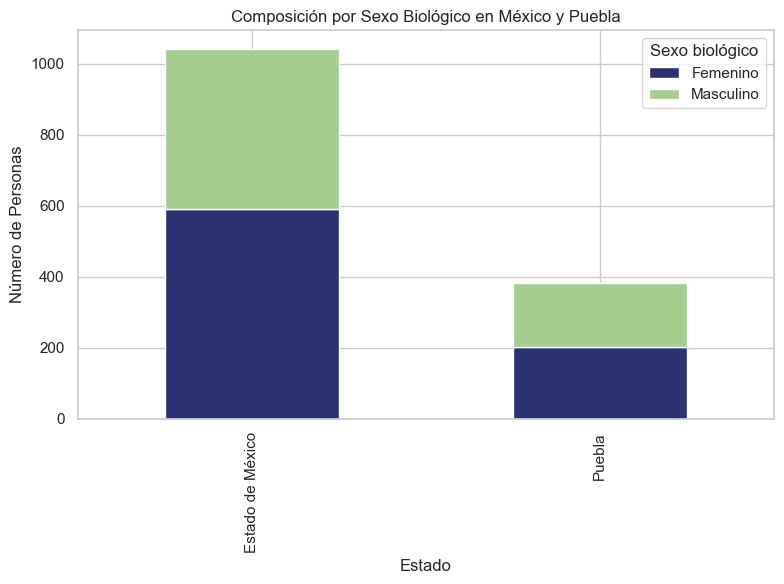

In [71]:
# Crear gráfico de barras apiladas
conteo.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='crest_r')

plt.title('Composición por Sexo Biológico en México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Número de Personas')
plt.legend(title='Sexo biológico')
plt.tight_layout()
plt.show()

### 🔍 Resultado:

Esto te dará un gráfico con **barras apiladas**: una para **México** y otra para **Puebla**, donde cada segmento de color representa un valor de `sexo_biologico`.

Si prefieres los porcentajes (por ejemplo: 70% hombres, 30% mujeres), también puedo ayudarte con eso. ¿Lo quieres por **porcentaje** en lugar de **conteo**?